## Синопсис проекта

**Ситуация** Необходимо проанализировать результаты маркетинговых мероприятий в отношении развлекательного приложения Procrastinate Pro+. 

**Вводные данные** Несколько месяцев на маркетинг приложения тратятся значительные суммы, но ожидаемого увеличения выручки не происходит. 

**Задачи** На основании имеющихся данных о посещениях приложения новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27, выгрузка их покупок за этот период, а также статистика рекламных расходов, необходимо: 
- изучить, как люди пользуются продуктом, 
- когда они начинают покупать, 
- сколько денег приносит каждый клиент, 
- когда он окупается,
- какие факторы отрицательно влияют на привлечение пользователей,
- выявить причины, по которым маркетинговые мероприятия не приводят к успеху,
- дать рекомендации отделу маркетинга по корректировке стратегии. 

**Логи**:
- информация о визитах пользователей в приложении
- информация о покупках пользователей в приложении
- информация о затратах на привлечение пользователей

## Шаг 1. Загрузка данных и подготовка их к анализу


### Загрузка данных и подготовка их к анализу

#### Загружаем необходимые библиотеки

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns

#### Загружаем и знакомимся с датасетами

In [3]:
#Загрузим данные и сохраним их в переменных visits, orders, costs

visits, orders, costs = ( 
    pd.read_csv('/datasets/visits_info_short.csv'),
    pd.read_csv('/datasets/orders_info_short.csv'),
    pd.read_csv('/datasets/costs_info_short.csv'),
)

In [4]:
#Выведем на экран первые 5 строчек имеющихся датасетов и информацию о них

view = [visits, orders, costs]
for i in view:
    display(i.head())
    i.info()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


По итогам просмотра имеющихся датасетов необходимо скорректировать написание названий столбцов, изменить типы данных на необходимые нам, а также удалить дубликаты, если они есть

#### Предобработка данных

In [5]:
#Приводим названия столбцов к единому стилю написания
for i in view:
    i.columns = i.columns.str.lower()
    i.columns = i.columns.str.replace(" ", "_")
    i.drop_duplicates(keep='first')

In [6]:
#Преобразовываем типы данных в датасетах на datetime и date

visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

In [7]:
#Посмотрим на предобработанные датасеты
for i in view:
    display(i.head())
    i.info()

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Данные готовы для дальнейшего исследования, но для общего представления необходимо составить представление с какой информацией нам предстоит столкнуться

In [8]:
costs['costs'].sum()

105497.30000000002

### Знакомство с данными (периоды)

Для начала проверим информацию о периодах, в отношении которых предоставлена информация

In [9]:
print(
    visits['session_start'].min(),
    visits['session_start'].max()
)

2019-05-01 00:00:41 2019-10-31 23:59:23


По представленным данным старт первой сессии произошел 01.05.2019, последней 31.10.2019

In [10]:
print(
    visits['session_end'].min(),
    visits['session_end'].max()
)

2019-05-01 00:07:06 2019-11-01 01:38:46


По представленным данным первое окончание сессии произошло 01.05.2019, последней 01.11.2019

In [11]:
print(
    orders['event_dt'].min(),
    orders['event_dt'].max()
)

2019-05-01 00:28:11 2019-10-31 23:56:56


По представленным данным первая покупка произошла 01.05.2019, последняя 31.10.2019

In [12]:
print(
    costs['dt'].min(),
    costs['dt'].max()
)

2019-05-01 2019-10-27


Период, когда компания платила за рекламу определен с 01.05.2019 по 27.10.2019

### Знакомство с данными (фактическая информация)

Далее познакомимся с фактической инофрмацие о странах, в которых были совершены покупки, девайсы покупателей и каналы их привлечения

In [13]:
visits['region'].sort_values().unique()

array(['France', 'Germany', 'UK', 'United States'], dtype=object)

В исследуемом периоде покупки совершали покупатели из Франции, Германии, Великобритании и США

In [14]:
visits['device'].sort_values().unique()

array(['Android', 'Mac', 'PC', 'iPhone'], dtype=object)

В исследуемом периоде покупки совершались на 4 типах устройств Android, Mac, PC, iPhone

In [15]:
visits['channel'].sort_values().unique()

array(['AdNonSense', 'FaceBoom', 'LeapBob', 'MediaTornado',
       'OppleCreativeMedia', 'RocketSuperAds', 'TipTop', 'WahooNetBanner',
       'YRabbit', 'lambdaMediaAds', 'organic'], dtype=object)

В исследуемом периоде покупки совершались через 10 каналов привлечения покупателей

In [16]:
costs['channel'].sort_values().unique()

array(['AdNonSense', 'FaceBoom', 'LeapBob', 'MediaTornado',
       'OppleCreativeMedia', 'RocketSuperAds', 'TipTop', 'WahooNetBanner',
       'YRabbit', 'lambdaMediaAds'], dtype=object)

Рекламные акции в исследуемом периоде затрагивали все каналы привлечения покупателей

### Знакомство с данными (выручка)¶

In [17]:
display(orders['revenue'].sort_values().value_counts(),
      f'Количество уникальных покупателей за период: {orders["user_id"].nunique()}',  
      f'Суммарная выручка за период: {orders["revenue"].sum()}',
      f'Общее количество транзакций: {orders["revenue"].count()}',
      f'Средняя выручка от одной транзакции: {round(orders["revenue"].mean(), 2)}')

4.99     38631
5.99       780
9.99       385
49.99      212
19.99      204
Name: revenue, dtype: int64

'Количество уникальных покупателей за период: 8881'

'Суммарная выручка за период: 215962.88'

'Общее количество транзакций: 40212'

'Средняя выручка от одной транзакции: 5.37'

**Резюме по разделу** На данном этапе исследования были проделаны следующие операции:
- Загрузил имеющиеся данные, убедился в отсутствии пропусков в данных;
- Привел названия стоолбцов всех датасетов к единому стилю написания;
- Преобразовали типы данных там, где мне это необходимо для дальнейшего исследования;
- Изучил имеющуюся фактическую информацию из датасетов и проверили периоды, в отношении которых предоставлены данные
- Изучил сведения о покупках в приложении

## Шаг 2. Функции для расчета и анализа LTV, ROI, удержания и конверсии

Загрузим функции, которые нам будут необходимы для реализации проекта

### Функция для создания пользовательских профилей

#### Функция создания профилей всех пользователей для анализа привлечения

In [18]:
def get_profiles(sessions, orders, ad_costs):

# находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = (profiles['acquisition_cost'].fillna(0)).round(2)
    
    # посчитаем сколько каждый уникальный покупатель принес выручки
    user_revenue = (
        orders.groupby('user_id')
        .agg({'revenue' : 'sum'})
        .rename(columns={'revenue': 'user_revenue'})
    )
    
    # добавляем сведения о выручке в профили
    profiles = profiles.merge(
        user_revenue,
        on='user_id',
        how='left',
    ).fillna(0)
    
    return profiles

<div class="alert alert-info"> <b>Комментарий студента v2:</b> Сделал дополнительно функцию для формирования профилей привлечеенных покупателей</div> 

#### Функция создания профилей привлеченных покупателей для анализа маркетинга

In [19]:
def get_profiles_payer(sessions, orders, ad_costs):

# находим параметры первых посещений
    profiles_payer = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles_payer['dt'] = profiles_payer['first_ts'].dt.date
    profiles_payer['month'] = profiles_payer['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles_payer['payer'] = profiles_payer['user_id'].isin(orders['user_id'].unique())
    
    # для проведения маркетингового исследования оставим только платящих пользователей, которые пришли через рекламные каналы
    profiles_payer = profiles_payer.query('(payer == True) & (channel != "organic")')


    # считаем количество уникальных покупателей
    # с одинаковыми источником и датой привлечения
    new_payer = (
        profiles_payer.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_payer'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых покупателей
    ad_costs = costs.merge(new_payer, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых покупателей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_payer']

    # добавляем стоимость привлечения в профили
    profiles_payer = profiles_payer.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # округлим стоимость привлечения покупателей
    profiles_payer['acquisition_cost'] = profiles_payer['acquisition_cost'].round(2)
    
    # посчитаем сколько каждый уникальный покупатель принес выручки
    payer_revenue = (
        orders.groupby('user_id')
        .agg({'revenue' : 'sum'})
        .rename(columns={'revenue': 'payer_revenue'})
    )
    
    # добавляем сведения о выручке в профили
    profiles_payer = profiles_payer.merge(
        payer_revenue,
        on='user_id',
        how='left',
    ).fillna(0)
    
    return profiles_payer

### Функция для расчёта удержания

In [20]:
def get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        visits[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### Функция для расчёта конверсии

In [21]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    
    
    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        orders.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### Функция для расчёта LTV и ROI

In [22]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    
    
    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        orders[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

### Функция для сглаживания фрейма

In [23]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

### Функция для визуализации удержания

In [24]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

### Функция для визуализации конверсии

In [25]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Функция для визуализации LTV и ROI

In [26]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## Шаг 3. Исследовательский анализ данных

Построим профили пользователей. 

Выясним:
- Какие страны дают больше всего платящих пользователей?
- С каких устройств чаще всего заходят платящие пользователи?
- Какие каналы приносят больше всего платящих пользователей?

### Построим профили пользователей

In [27]:
profiles = get_profiles(visits, orders, costs)
display(profiles.head(),
        f"Общее количество пользователей: {profiles['user_id'].count()}",
        f"Общее количество покупателей: {profiles[profiles['payer'] == True]['user_id'].count()}",
        f"Доля покупающих пользователей от общего числа пользователей: {(profiles[profiles['payer'] == True]['user_id'].count() / profiles['user_id'].count()).round(2)}",
        f"Общая сумма направленная на рекламу в исследуемом периоде: {round(profiles['acquisition_cost'].sum(), 2)}",
        f"Общая выручка от всех пользователей: {round(profiles['user_revenue'].sum(), 2)}")

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost,user_revenue
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.09,14.97
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.11,0.00
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.00,0.00
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.99,0.00
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.23,0.00


'Общее количество пользователей: 150008'

'Общее количество покупателей: 8881'

'Доля покупающих пользователей от общего числа пользователей: 0.06'

'Общая сумма направленная на рекламу в исследуемом периоде: 105500.76'

'Общая выручка от всех пользователей: 215962.88'

**Выводы** Бросатеся в глаза, что только около 6 процентов пользователей приложением переходят в разряд покупателей. Однако затрудняюсь на данном этапе делать какие то выводы из этого, кроме того, что приложение привлекает достаточно много пользователей.

### Получим данные о показателях конверсии по каналам

In [28]:
cr_channel = (profiles.groupby('channel')
            .agg({'user_id': 'count'})
            .reset_index()
            .sort_values(by='user_id', ascending=False)
            .reset_index(drop=True)
    )


y = (profiles.query('user_revenue > 0')
        .groupby('channel')
        .agg({'user_id': 'count'})
        .reset_index()
        .sort_values(by='user_id', ascending=False)
        .reset_index(drop=True)
        )
cr_channel = cr_channel.merge(y, on='channel', how='left')
cr_channel = cr_channel.rename(columns={'user_id_x' : 'user', 'user_id_y' : 'payer'})
cr_channel['conversion, %'] = (cr_channel['payer'] * 100 / cr_channel['user']).round(2)
cr_channel = cr_channel.sort_values(by='payer', ascending=False).reset_index(drop=True)
cr_channel

,channel,user,payer,"conversion, %"
0,FaceBoom,29144,3557,12.20
1,TipTop,19561,1878,9.60
2,organic,56439,1160,2.06
3,WahooNetBanner,8553,453,5.30
4,AdNonSense,3880,440,11.34
5,RocketSuperAds,4448,352,7.91
6,LeapBob,8553,262,3.06
7,OppleCreativeMedia,8605,233,2.71
8,lambdaMediaAds,2149,225,10.47
9,YRabbit,4312,165,3.83


**Промежуточные выводы** Лучшие показатели по конверсии, как количественные, так и качественные показывает FaceBoom, также неплохие покахатели у TipTop. Остальные показатели значительно уступают по количественному критерию, поэтому будет некорректно их выделять.

Посмотрим, как изменятся показатели конверсии, если сделать свод по регионам и каналам

In [29]:
cr_channel = (profiles.groupby(['region', 'channel'])
            .agg({'user_id': 'count'})
            .reset_index()
            .sort_values(by='user_id', ascending=False)
            .reset_index(drop=True)
    )


y = (profiles.query('user_revenue > 0')
        .groupby('channel')
        .agg({'user_id': 'count'})
        .reset_index()
        .sort_values(by='user_id', ascending=False)
        .reset_index(drop=True)
        )
cr_channel = cr_channel.merge(y, on='channel', how='left')
cr_channel = cr_channel.rename(columns={'user_id_x' : 'user', 'user_id_y' : 'payer'})
cr_channel['conversion, %'] = (cr_channel['payer'] * 100 / cr_channel['user']).round(2)
cr_channel = cr_channel.sort_values(by=['region', 'payer'], ascending=False).reset_index(drop=True)
cr_channel

,region,channel,user,payer,"conversion, %"
0,United States,FaceBoom,29144,3557,12.20
1,United States,TipTop,19561,1878,9.60
2,United States,organic,38173,1160,3.04
3,United States,RocketSuperAds,4448,352,7.91
4,United States,YRabbit,4312,165,3.83
5,United States,MediaTornado,4364,156,3.57
6,UK,organic,6421,1160,18.07
7,UK,WahooNetBanner,3003,453,15.08
8,UK,AdNonSense,1295,440,33.98
9,UK,LeapBob,3046,262,8.60


**Выводы** В разрезе регионов картина несколько изменилась, что говорит о том, что основные показатели генерируются в США (они скорректировались незначительно), а вот по европейским странам конверсия по рекламным каналам изменилась значительно, что говорит о том, что исследователький анализ надо проводить с учетом различия показателей по США и Европе. Также можно отметить, что в Европе и США используются разные рекламные каналы.

### Получим данные о показателях конверсии по девайсам

In [30]:
cr_device = (profiles.groupby('device')
            .agg({'user_id': 'count'})
            .reset_index()
            .sort_values(by='user_id', ascending=False)
            .reset_index(drop=True)
    )


y = (profiles.query('user_revenue > 0')
        .groupby('device')
        .agg({'user_id': 'count'})
        .reset_index()
        .sort_values(by='user_id', ascending=False)
        .reset_index(drop=True)
        )
cr_device = cr_device.merge(y, on='device', how='left')
cr_device = cr_device.rename(columns={'user_id_x' : 'user', 'user_id_y' : 'payer'})
cr_device['conversion, %'] = (cr_device['payer'] * 100 / cr_device['user']).round(2)
cr_device = cr_device.sort_values(by='payer', ascending=False).reset_index(drop=True)
cr_device

,device,user,payer,"conversion, %"
0,iPhone,54479,3382,6.21
1,Android,35032,2050,5.85
2,Mac,30042,1912,6.36
3,PC,30455,1537,5.05


**Вывод** Показатели конверсии в зависимости от девайса в целом одинаковые от 5 до 6,2 %

### Получим данные о показателях конверсии по регионам

In [31]:
cr_region = (profiles.groupby('region')
            .agg({'user_id': 'count'})
            .reset_index()
            .sort_values(by='user_id', ascending=False)
            .reset_index(drop=True)
    )


y = (profiles.query('user_revenue > 0')
        .groupby('region')
        .agg({'user_id': 'count'})
        .reset_index()
        .sort_values(by='user_id', ascending=False)
        .reset_index(drop=True)
        )
cr_region = cr_region.merge(y, on='region', how='left')
cr_region = cr_region.rename(columns={'user_id_x' : 'user', 'user_id_y' : 'payer'})
cr_region['conversion, %'] = (cr_region['payer'] * 100 / cr_region['user']).round(2)
cr_region = cr_region.sort_values(by='payer', ascending=False).reset_index(drop=True)
cr_region

,region,user,payer,"conversion, %"
0,United States,100002,6902,6.90
1,UK,17575,700,3.98
2,France,17450,663,3.80
3,Germany,14981,616,4.11


**Выводы** Показатели конверсии по США значительно выше,чем в европейских странах. Вероятно это связанно с нюансами региональной адаптации контента.

### Распределение выручки в разрезе рекламных каналов

In [32]:
revenue_channel = profiles.pivot_table(index='channel', values='user_revenue', aggfunc='sum').reset_index().sort_values(by='user_revenue', ascending=False).reset_index(drop=True)
revenue_channel['share_revenue, %'] = (revenue_channel['user_revenue']*100 / sum(revenue_channel['user_revenue'])).round(2)
revenue_channel = revenue_channel.rename(columns={'user_revenue' : 'channel_revenue'})
revenue_channel

,channel,channel_revenue,"share_revenue, %"
0,TipTop,69574.76,32.22
1,organic,46627.23,21.59
2,FaceBoom,25637.66,11.87
3,WahooNetBanner,20006.63,9.26
4,RocketSuperAds,11598.32,5.37
5,LeapBob,9560.13,4.43
6,lambdaMediaAds,8941.70,4.14
7,OppleCreativeMedia,8365.53,3.87
8,YRabbit,6201.43,2.87
9,MediaTornado,5752.32,2.66


**Вывод** Почти треть выручки приносят покупатели пришедшие через канал TipTop, чуть больше 20% выручки приносят органические покупатели.

### Распределение выручки в разрезе стран и рекламных каналов

In [33]:
revenue_channel_reg = profiles.pivot_table(index=['region', 'channel'], values='user_revenue', aggfunc='sum').reset_index().sort_values(by=['region', 'user_revenue'], ascending=False).reset_index(drop=True)
revenue_channel_reg['share_revenue, %'] = (revenue_channel_reg['user_revenue']*100 / sum(revenue_channel_reg['user_revenue'])).round(2)
revenue_channel_reg = revenue_channel_reg.rename(columns={'user_revenue' : 'channel_revenue'})
revenue_channel_reg

,region,channel,channel_revenue,"share_revenue, %"
0,United States,TipTop,69574.76,32.22
1,United States,organic,31157.73,14.43
2,United States,FaceBoom,25637.66,11.87
3,United States,RocketSuperAds,11598.32,5.37
4,United States,YRabbit,6201.43,2.87
5,United States,MediaTornado,5752.32,2.66
6,UK,WahooNetBanner,7004.38,3.24
7,UK,organic,5728.66,2.65
8,UK,LeapBob,3901.75,1.81
9,UK,OppleCreativeMedia,3498.65,1.62


**Вывод** В целом, эта таблица подтверждает уже полученные ранее результаты, но мы получили более детальные сведения по выручке в европейских страна в завиимости от рекламного канала. Это поможет детализировать рекомендации по европейскому рынку.

### Сводная таблица по регионам и рекламным каналам

Для наглядности сведем ранее полученные сведения по конверсии и выручке, в зависимости от региона и рекламного канала, а также определим, благодаря каким каналам приходят наиболее качественные покупатели.

In [34]:
channel_date = cr_channel.merge(revenue_channel_reg, on=['region', 'channel'], how='inner')
channel_date['revenue_payer_mean'] = (channel_date['channel_revenue'] / channel_date['payer']).round(2)
channel_date = channel_date.sort_values(['region', 'revenue_payer_mean', 'channel'], ascending=False).reset_index(drop=True)
channel_date

,region,channel,user,payer,"conversion, %",channel_revenue,"share_revenue, %",revenue_payer_mean
0,United States,YRabbit,4312,165,3.83,6201.43,2.87,37.58
1,United States,TipTop,19561,1878,9.60,69574.76,32.22,37.05
2,United States,MediaTornado,4364,156,3.57,5752.32,2.66,36.87
3,United States,RocketSuperAds,4448,352,7.91,11598.32,5.37,32.95
4,United States,organic,38173,1160,3.04,31157.73,14.43,26.86
5,United States,FaceBoom,29144,3557,12.20,25637.66,11.87,7.21
6,UK,WahooNetBanner,3003,453,15.08,7004.38,3.24,15.46
7,UK,OppleCreativeMedia,3052,233,7.63,3498.65,1.62,15.02
8,UK,lambdaMediaAds,758,225,29.68,3355.19,1.55,14.91
9,UK,LeapBob,3046,262,8.60,3901.75,1.81,14.89


**Выводы**:
- наиболее эффективным каналом привлечения платящих пользователей является FaceBoom, на втором месте TipTop, на третьем месте Organic. 
- больше всего выручки приносит канал TipTop и бесплатные покупатели (Organic)
- бросается в глаза, что средняя выручка одного покупателя пришедшего из FaceBoom очень низкая, то есть канал дает очень хорошие показатели конверсии, но покупатели покупают очень мало контента. Вероятно что то не так с самим каналом, возможно реклама настроена таким образом, что привлекает не целевую аудиторию, на которую расчитан контент приложения, либо дело в какой то технической ошибке

## Шаг 4. Маркетинг

Найдем ответы на следующие вопросы:
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

### Профили привлеченных покупателей

In [35]:
profiles_payer = get_profiles_payer(visits, orders, costs)
display(profiles_payer.head(),
        f"Общее количество привлеченных покупателей: {profiles_payer['user_id'].count()}",
        f"Общая сумма расходов направленных на рекламу в исследуемом периоде: {round(profiles_payer['acquisition_cost'].sum(), 2)}",
        f"Общая выручка от всех привлеченных покупателей: {round(profiles_payer['payer_revenue'].sum(), 2)}")

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost,payer_revenue
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,10.12,14.97
1,46006712,2019-06-30 03:46:29,AdNonSense,Android,France,2019-06-30,2019-06-01,True,25.20,4.99
2,374052872,2019-08-08 15:42:57,TipTop,Mac,United States,2019-08-08,2019-08-01,True,32.10,39.92
3,414791703,2019-05-03 12:01:28,TipTop,iPhone,United States,2019-05-03,2019-05-01,True,7.11,49.90
4,785077127,2019-06-27 08:31:39,TipTop,Mac,United States,2019-06-27,2019-06-01,True,19.12,99.89


'Общее количество привлеченных покупателей: 7721'

'Общая сумма расходов направленных на рекламу в исследуемом периоде: 102511.32'

'Общая выручка от всех привлеченных покупателей: 169335.65'

### Расходы на рекламу в разрезе источников привлечения

Для начала составим общее представление о рекламных расходах и привлеченных пользователях в зависимости от канала привлечения, а, также определим среднюю стоимость привлечения пользователей. Как мы выяснили ранее, для нас важно разделять наши показатели, в зависимости от региона.

In [36]:
pay_channel = (profiles_payer.groupby(['region', 'channel'])
                        .agg({'user_id' : 'nunique',
                              'acquisition_cost': 'sum',
                              'payer_revenue' : 'sum'
                              })
                        .reset_index()
                        .sort_values(by=['region', 'acquisition_cost'], ascending=False)
                        .rename(columns={'acquisition_cost' : 'payer_cost',
                                         'user_id' : 'payer'})
                        .reset_index(drop=True)
)


pay_channel

,region,channel,payer,payer_cost,payer_revenue
0,United States,TipTop,1878,54751.71,69574.76
1,United States,FaceBoom,3557,32447.01,25637.66
2,United States,RocketSuperAds,352,1589.82,11598.32
3,United States,MediaTornado,156,624.48,5752.32
4,United States,YRabbit,165,622.59,6201.43
5,UK,WahooNetBanner,153,1521.59,7004.38
6,UK,AdNonSense,148,1200.32,1253.69
7,UK,OppleCreativeMedia,89,638.14,3498.65
8,UK,LeapBob,103,518.38,3901.75
9,UK,lambdaMediaAds,76,364.44,3355.19


Расчитаем средние затраты на привлечение одного покупателя и среднюю выручку с одного покупателя в зависимости от региона и канала

In [37]:
pay_channel['cost_payer_mean'] = (pay_channel['payer_cost'] / pay_channel['payer']).round(2)
pay_channel['revenue_payer_mean'] = (pay_channel['payer_revenue'] / pay_channel['payer']).round(2)
pay_channel

,region,channel,payer,payer_cost,payer_revenue,cost_payer_mean,revenue_payer_mean
0,United States,TipTop,1878,54751.71,69574.76,29.15,37.05
1,United States,FaceBoom,3557,32447.01,25637.66,9.12,7.21
2,United States,RocketSuperAds,352,1589.82,11598.32,4.52,32.95
3,United States,MediaTornado,156,624.48,5752.32,4.00,36.87
4,United States,YRabbit,165,622.59,6201.43,3.77,37.58
5,UK,WahooNetBanner,153,1521.59,7004.38,9.95,45.78
6,UK,AdNonSense,148,1200.32,1253.69,8.11,8.47
7,UK,OppleCreativeMedia,89,638.14,3498.65,7.17,39.31
8,UK,LeapBob,103,518.38,3901.75,5.03,37.88
9,UK,lambdaMediaAds,76,364.44,3355.19,4.80,44.15


**Выводы** По сводным данным уже можно наблюдать интересные моменты:
- Затраты на привлечение одного покупателя очень сильно выделяются, что не может быть оценено, как нормальный показательб
- выручка полученная от покупателей привлеченных по каналам FaceBoom в США ниже затрат на привлечение покупателейб
- такая же ситуация с каналом AdNonSense в Европе

### Расходы на рекламу по времени

In [38]:
cost_month = (profiles.groupby('month')
                        .agg({'acquisition_cost': 'sum'})
                        .reset_index()
                        .sort_values(by='month')
                        .reset_index(drop=True)
)
cost_month

,month,acquisition_cost
0,2019-05-01,9976.61
1,2019-06-01,15092.72
2,2019-07-01,16448.41
3,2019-08-01,20657.40
4,2019-09-01,22441.74
5,2019-10-01,20883.88


**Вывод** Видно, что расходы на рекламу планомерно увеличивались.

### Привлечение с разбивкой по месяцам

In [39]:
user_month = (profiles.groupby('month')
                        .agg({'user_id': 'nunique'})
                        .reset_index()
                        .sort_values(by='month')
                        .reset_index(drop=True)
)

user_month

,month,user_id
0,2019-05-01,27111
1,2019-06-01,23123
2,2019-07-01,22627
3,2019-08-01,26586
4,2019-09-01,26327
5,2019-10-01,24234


In [40]:
payer_month = (profiles.query('payer == True')
                        .groupby('month')
                        .agg({'user_id': 'nunique'})
                        .reset_index()
                        .sort_values(by='month')
                        .reset_index(drop=True)
)

payer_month

,month,user_id
0,2019-05-01,1321
1,2019-06-01,1441
2,2019-07-01,1393
3,2019-08-01,1587
4,2019-09-01,1665
5,2019-10-01,1474


In [41]:
cost_month['acquisition_cost'].corr(user_month['user_id'])

0.0023281640088454922

In [42]:
cost_month['acquisition_cost'].corr(payer_month['user_id'])

0.8832985512184404

**Вывод** Наибольшее количество покупателей наблюдается в сентябре 2019 года, также был вывлен значительный коэффициент корреляции между увеличением затрат на рекламу и привлечением покупателей, при этом корреляция между затратами на рекламу и привлеченными пользователями в целом незначительная.

## Шаг 5. Оценим окупаемость рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируем общую окупаемость рекламы;
- Проанализируем окупаемость рекламы с разбивкой по устройствам;
- Проанализируем окупаемость рекламы с разбивкой по странам;
- Проанализируем окупаемость рекламы с разбивкой по рекламным каналам.

Опишем проблемы, которые обнаружим. Ответим на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучим конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишем возможные причины обнаруженных проблем и сформируем рекомендации для рекламного отдела. 

Зададим момент и горизонт анализа

In [43]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14


### Проанализируем общую окупаемость рекламы

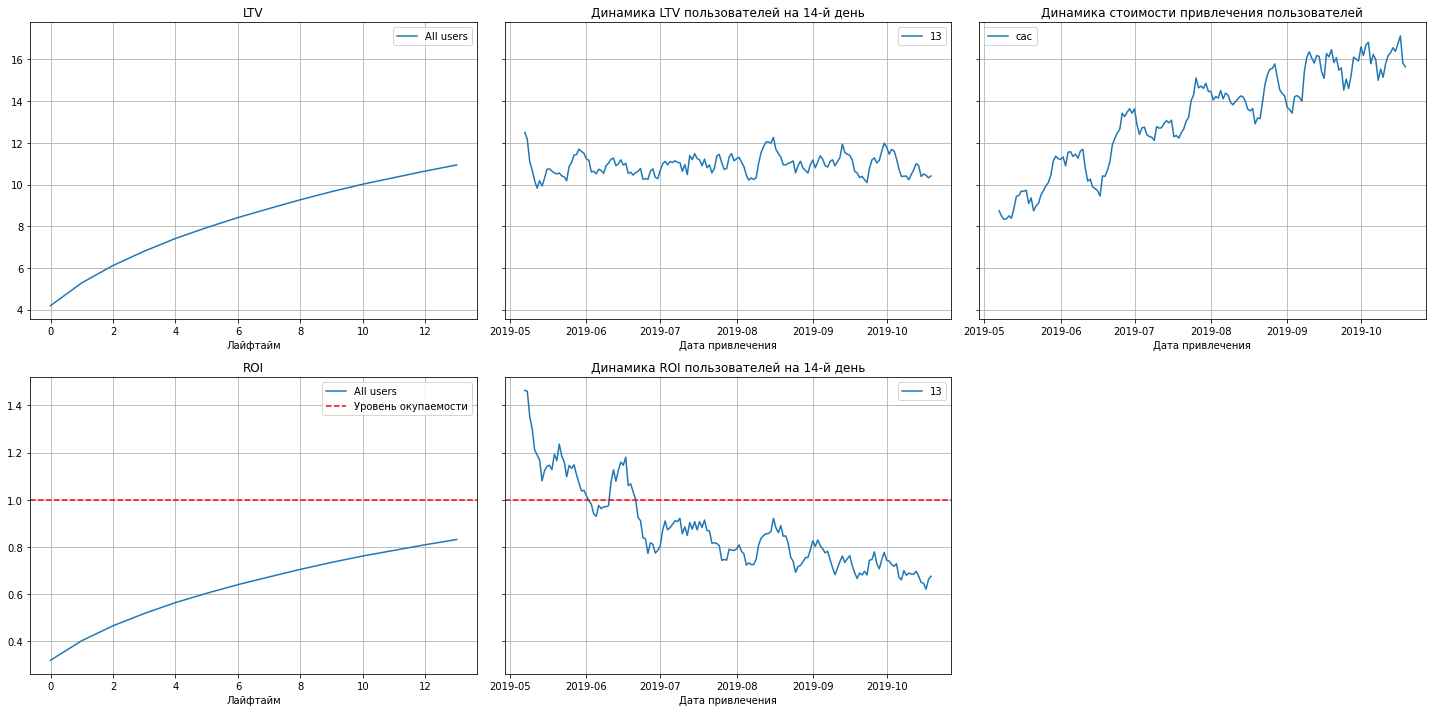

In [44]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_payer, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

**Выводы**:
- По графику LTV особых вопросов нет
- Стоимость привлечения пользователей начиная с июня 2019 года имеет тенденцию к планомерному росту, что скорее показывает, что маркетинговый отдел пытался за счет увеличения рекламного бюджета стабилизировать выручку
- График ROI показывает, что в рамках исследуемого периода общие затраты на рекламу не окупаются
- Динамика окупаемости на 14 день снижается с мая и уходит ниже порога окупаемости примерно с середины июня, после небольшого всплеска

### Проанализируйте окупаемость рекламы с разбивкой по устройствам

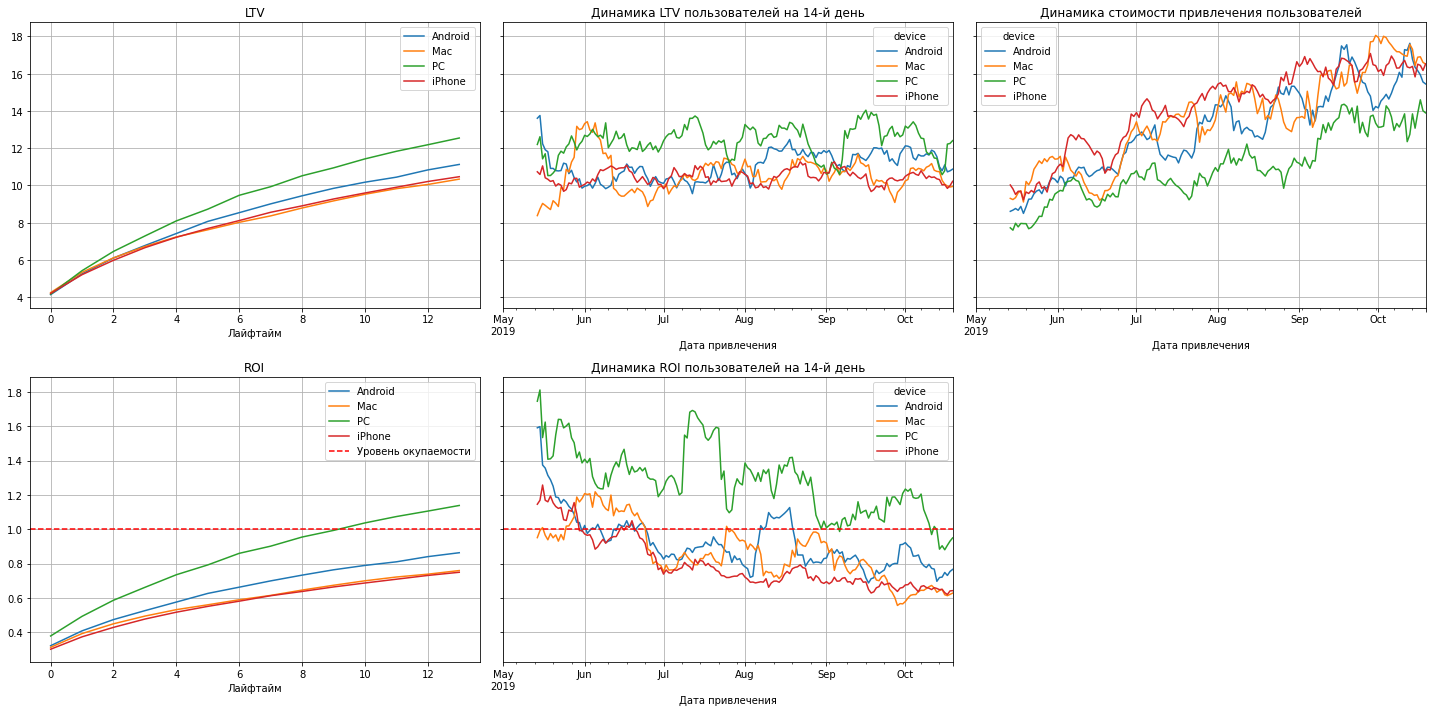

In [45]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_payer, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Выводы** Окупается реклама только на PC на 9 день, на остальных устройствах реклама не окупается

### Проанализируйте окупаемость рекламы с разбивкой по странам

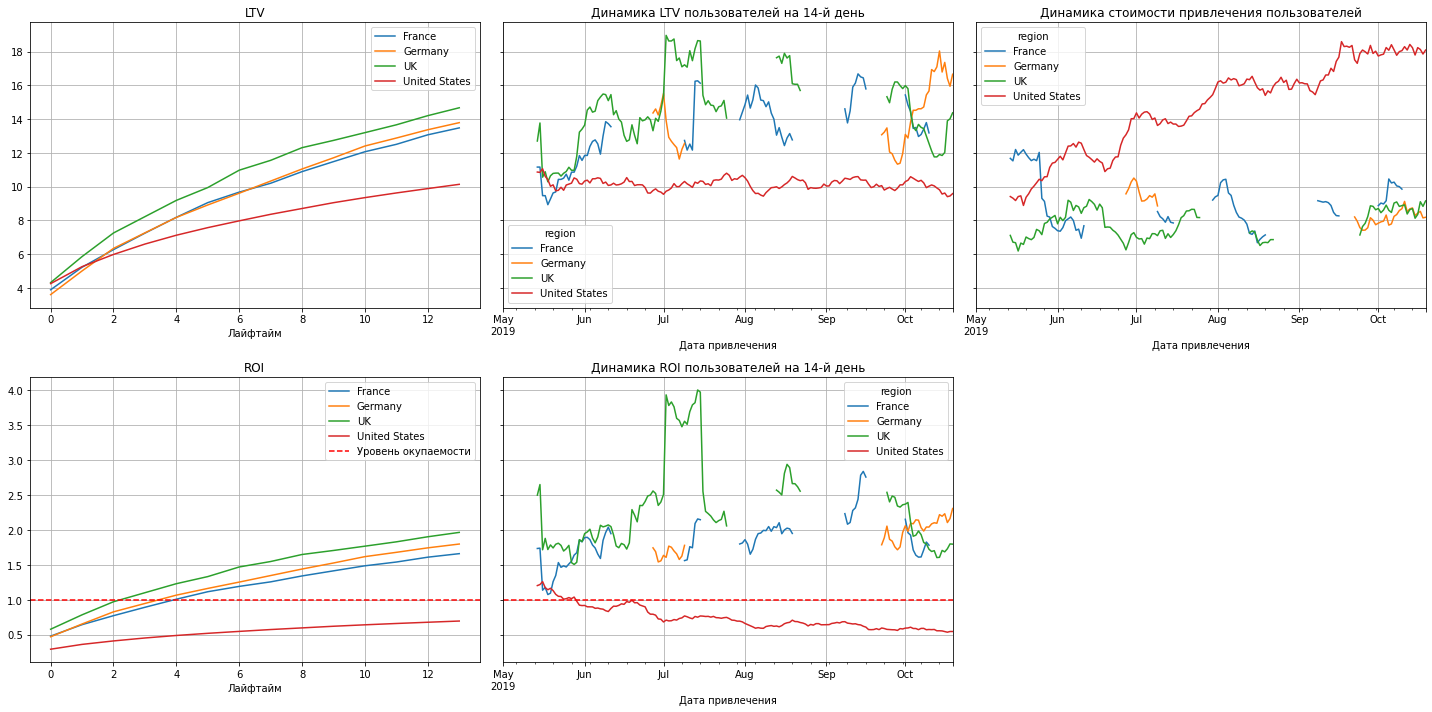

In [46]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_payer, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Выводы** Данный блок показывает, что проблема неокупаемости рекламы находится в США, поскольку во всех остальных странах реклама стабильно окупается и отсутсвует тренд на снижение динамики окупаемости в исследуемом периоде, как и рост динамики стоимости привлечения пользователей

### Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам

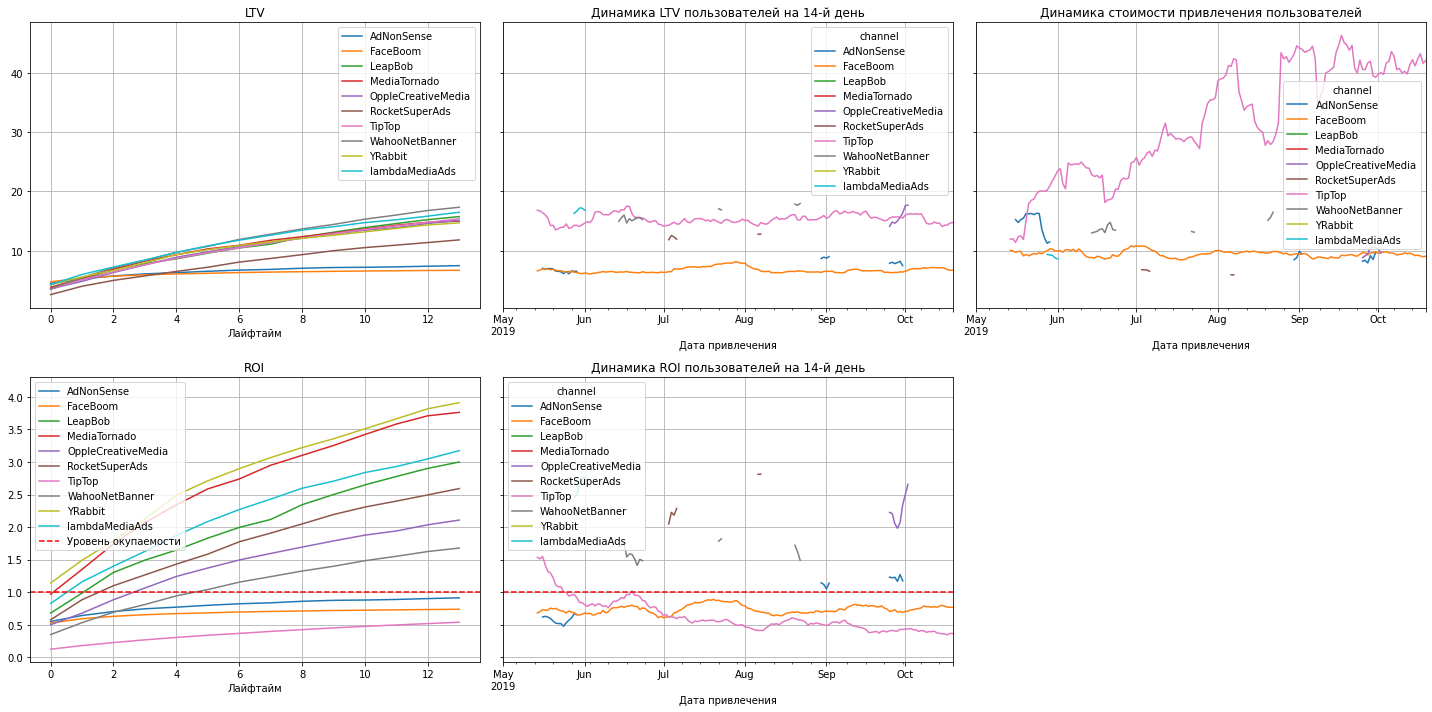

In [47]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_payer, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

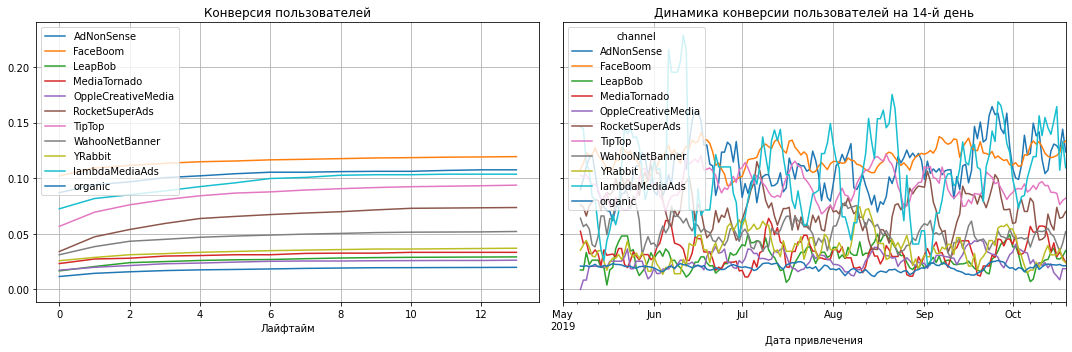

In [48]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

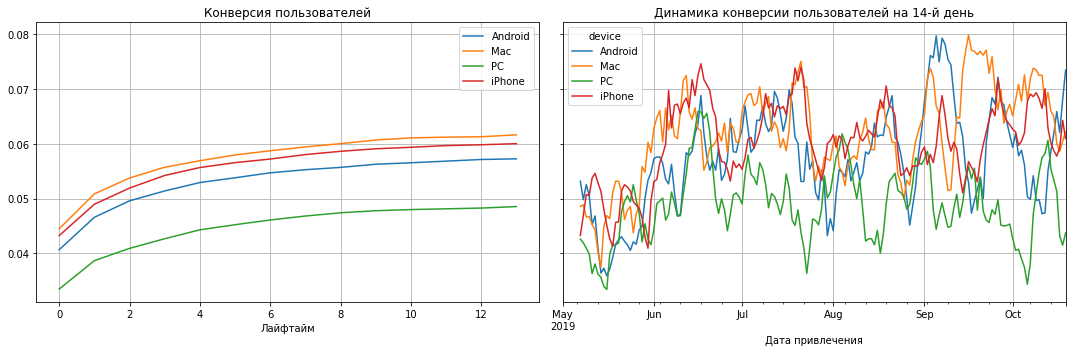

In [49]:
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

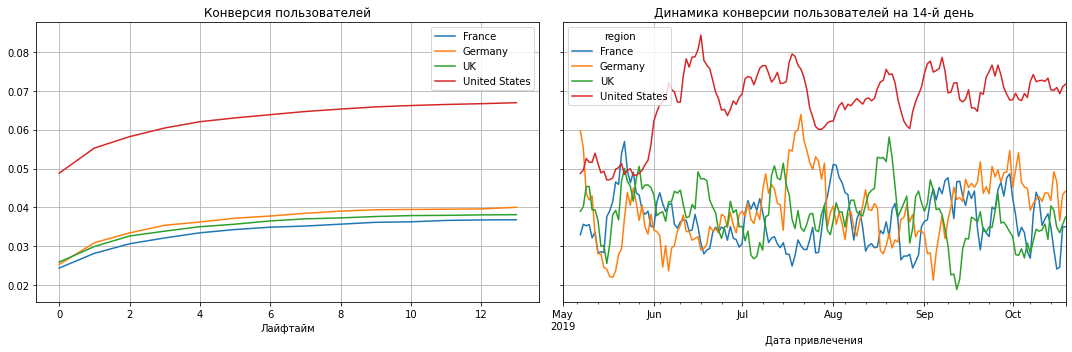

In [51]:
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

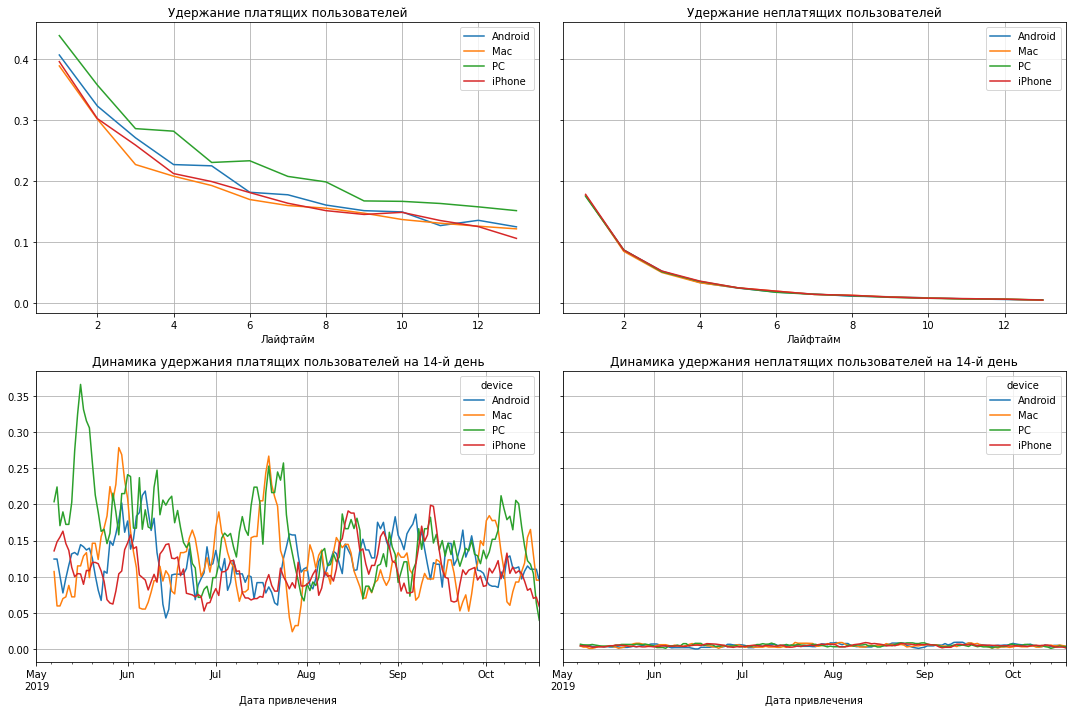

In [50]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

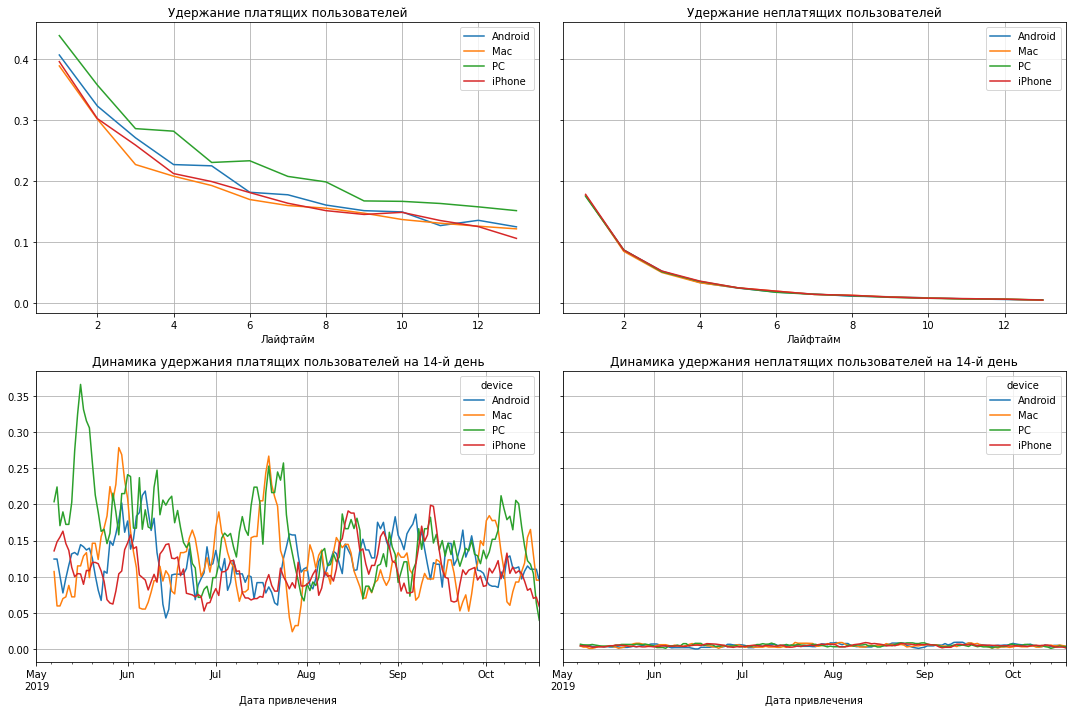

In [53]:
dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

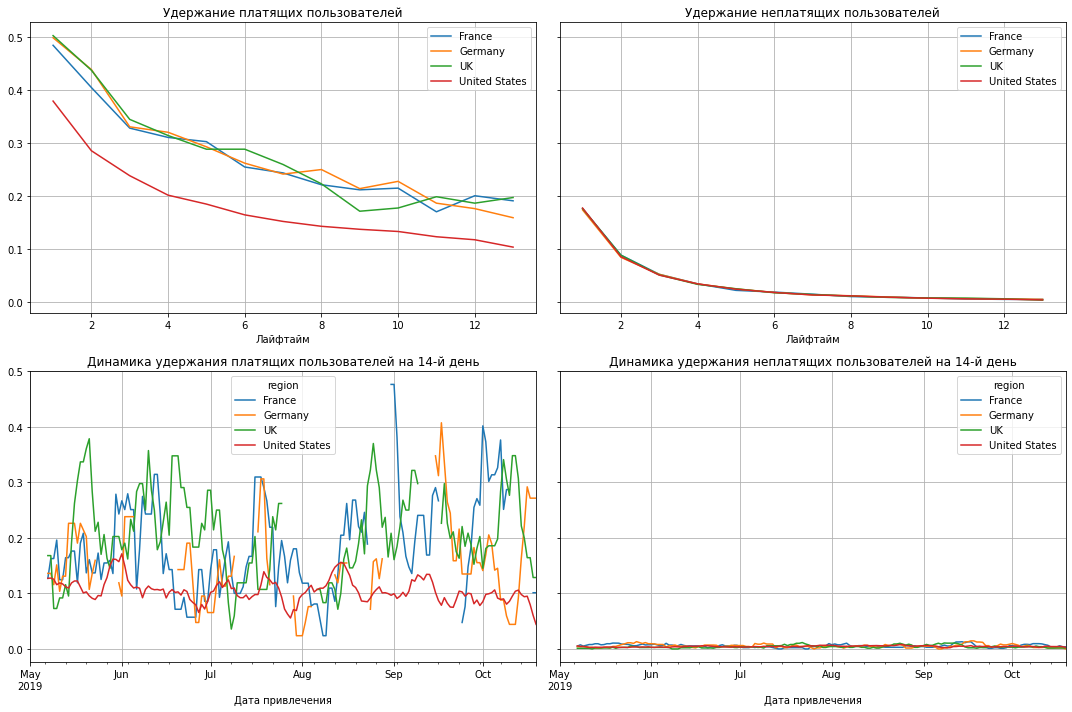

In [54]:
dimensions = ['region']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

## Шаг 6. Общие выводы
- Выделите причины неэффективности привлечения пользователей;
- Сформируйте рекомендации для отдела маркетинга для повышения эффективности.

**Причины неэффективности**:
- покупатели пришедшие через рекламный канал FaceBoom практически не задерживаются на платформе, то есть существует какая то проблема с удержанием, которую необходимо выявить, вероятно проблема носит какой то техничекий характер, поскольку показатели привлечения пользователей у это платформы очень хорошие. Либо проблема с самими покупателями, которые не являются целевой аудиторией нашего приложения.
- также есть проблема с каналом TipTop, по которому показатели по динамике увеличения стоимости привлечения одного покупателя напрямую повлияло на снижение динамики ROI в исследуемом периоде


**Рекомендации**:
- Выявить точную причину низкого удержания пользователей пришедших через канал FaceBoom
- Необходимо проанализировать и возможно пересмотреть маркетинговую стратегию в отношении канала TipTop, с целью снижения стоимости привлечения и сохранения качества привлекаемых покупателей, а как следствие увеличения показателя ROI
- Также, в случае, если необходимо активизировать работу по европейскому рынку, стоит отказаться от рекламного канала AdNonSense и увеличить рекламный бюджет на рекламный канал WahooNetBanner